In [5]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


class RBFnn:
    def __init__(self, X, y, center_method, sigma):
        self.X = X
        self.y = y
        self.center_method = center_method
        self.sigma = sigma
        self.centers = None
        self.w = None

    def square_distance(self, X1, X2):
        return np.dot((X1-X2).T, X1-X2)

    def fit(self):
        if self.center_method == 1:
            self.centers = self.X
        elif self.center_method == 2:
            idx = np.random.randint(self.X.shape[0], size=150)
            self.centers = self.X[idx, :]
        elif self.center_method == 3:
            kmeans = KMeans(n_clusters=150).fit(self.X)
            self.centers = kmeans.cluster_centers_

        G = np.array([[(1 / np.exp(-self.square_distance(x, c)/(2*(self.sigma**2)))) for c in self.centers] for x in self.X])
        self.w = np.dot(np.dot(np.linalg.pinv(np.dot(G.T, G)), G.T), self.y)

    def predict(self, X):
        y_pred = np.dot(np.array([[(1 / np.exp(-self.square_distance(x, c) / (2 * (self.sigma ** 2)))) for c in self.centers] for x in X]), self.w)
        return y_pred

    def mse(self, y, y_pred):
        N = y.shape[0]
        return np.dot((y_pred-y).T, (y_pred-y))[0][0] / N
    
    def get_acc(self, y, y_pred):
        corr = 0
        for i in range(0, len(y)):
            corr += 1 if (y[i] == y_pred[i]) else 0
        return corr / len(y)

In [7]:
data = np.array([[-2+0.2*i, -2+0.2*j] for i in range(21) for j in range(21)])
label = np.array([[1] if x[0]**2+x[1]**2 <= 1 else [-1] for x in data])
idx = np.random.permutation(data.shape[0])
data = data[idx]
label = label[idx]
split_idx = int(441*0.8)
train_data = data[:split_idx]
train_label = label[:split_idx]
test_data = data[split_idx:]
test_label = label[split_idx:]

c:\Python39\lib\site-packages\matplotlib\collections.py:1098: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


Text(0.5, 1.0, 'Data set of 441 randomly generated points.')

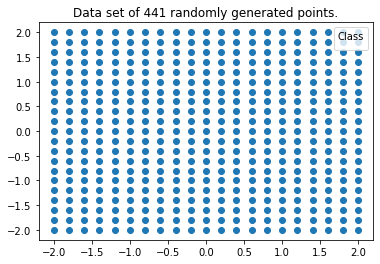

In [14]:
p = plt.scatter(data[:, 0], data[:, 1], label[:])
plt.legend(*p.legend_elements(prop = 'colors'), loc="best", title="Class")
plt.title("Data set of 441 randomly generated points.")

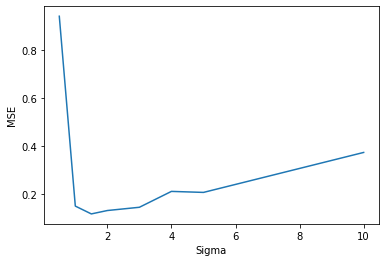

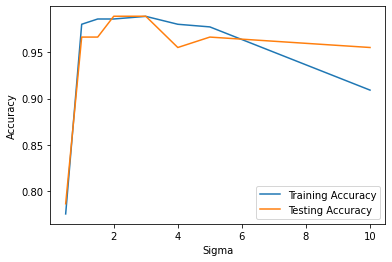

In [8]:
sigmas = [0.5, 1, 1.5, 2, 3, 4, 5, 10]
mses = []
test_accs = []
train_accs = []
for sigma in sigmas:
    net = RBFnn(X=train_data, y=train_label, center_method=1, sigma=sigma)
    net.fit()
    # prediction on data
    y_pred = net.predict(train_data)
    mses.append(net.mse(train_label, y_pred))
    # get final output with binary
    y_output = np.where(y_pred < 0, -1, 1)
    train_accs.append(net.get_acc(train_label, y_output))
    y_pred = net.predict(test_data)
    y_output = np.where(y_pred < 0, -1, 1)
    test_accs.append(net.get_acc(test_label, y_output))
plt.figure()
plt.plot(sigmas, mses)
plt.xlabel('Sigma')
plt.ylabel('MSE')
plt.show()
plt.figure()
plt.plot(sigmas, train_accs)
plt.plot(sigmas, test_accs)
plt.xlabel('Sigma')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Testing Accuracy'])
plt.show()

In [9]:
print(mses)
print(train_accs)
print(test_accs)

[0.9400440664093866, 0.14872285850644978, 0.11607803003148155, 0.1302146164399043, 0.14377643495317186, 0.20995219106432117, 0.20572192987723226, 0.37233563572776146]
[0.7755681818181818, 0.9801136363636364, 0.9857954545454546, 0.9857954545454546, 0.9886363636363636, 0.9801136363636364, 0.9772727272727273, 0.9090909090909091]
[0.7865168539325843, 0.9662921348314607, 0.9662921348314607, 0.9887640449438202, 0.9887640449438202, 0.9550561797752809, 0.9662921348314607, 0.9550561797752809]


# Q2

In [10]:
net = RBFnn(X=train_data, y=train_label, center_method=2, sigma=2)
net.fit()
y_pred = net.predict(train_data)
y_output = np.where(y_pred < 0, -1, 1)
print(net.get_acc(train_label, y_output))
y_pred = net.predict(test_data)
y_output = np.where(y_pred < 0, -1, 1)
print(net.get_acc(test_label, y_output))

0.9914772727272727
0.9662921348314607


In [11]:
net = RBFnn(X=train_data, y=train_label, center_method=3, sigma=2)
net.fit()
y_pred = net.predict(train_data)
y_output = np.where(y_pred < 0, -1, 1)
print(net.get_acc(train_label, y_output))
y_pred = net.predict(test_data)
y_output = np.where(y_pred < 0, -1, 1)
print(net.get_acc(test_label, y_output))

0.9857954545454546
0.9887640449438202


# Reference
1. ECE657 Lecture slides Set3 
2. https://github.com/paulwong16/ECE657-Tools_of_Intelligent_Sys_Design/blob/master/a2/Q3.ipynb
3. https://github.com/rkarwayun/ECE657/blob/master/RBF%20NN/RBF_NN.ipynb